# Demo -- Yield Strength Envelope
Show the current use cases of the litho code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from litho import Litho # imports the Litho class from litho.py (in the working dir)

In [2]:
def plot_YSE(ax,ysc,yst,z,**kwargs):
    ax.plot(1e-6*ysc,-1e-3*z,**kwargs)
    ax.plot(1e-6*yst,-1e-3*z,**kwargs)
    ax.set_xlim(np.min(1e-6*ysc)-50, np.max(1e-6*yst)+50)
    ax.set_ylim(-10, 0)

We'll start with an instance of the Litho class and call it 'myLith'.
The 'print_vals()' method will display some of the class attributes that might be of interest, and this can be expanded to print more stuff.
One can override the defaults by supplying a key=value pair as an argument in the instantiation, or manually with setattr().

In [3]:
myLith = Litho()
print("Defaults")
myLith.print_vals()
print("---------------------------------")
print("Overriding default crust flow law")
myLith = Litho(crust_flow=1)
myLith.print_vals()

Defaults
Crustal Thickness:   6.0 km
Crustal Flow Law:    Dry Olivine
Full Spreading Rate: 4.0 cm/yr
Plate Thickness:     125.0 km
Ridge Axis Depth:    2.6 km
---------------------------------
Overriding default crust flow law
Crustal Thickness:   6.0 km
Crustal Flow Law:    Wet Olivine
Full Spreading Rate: 4.0 cm/yr
Plate Thickness:     125.0 km
Ridge Axis Depth:    2.6 km


The Litho class has a few methods that compute mechanical and thermal values, and they can be called as desired. The only real requirement is an "age of crust" for the calculations.
For instance, one can generate a temperature profile at a given age using one of a few different cooling models.

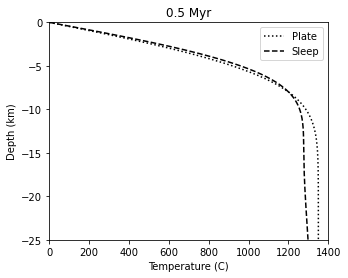

In [25]:
age = 0.5 # in Myr
tPlate = myLith.get_temperature(age) # using the default model, Plate cooling
tSleep = myLith.get_temperature(age,model=2) # using the Sleep (1975) cooling model
fig, ax = plt.subplots(figsize=(5.0,4.0))
ax.plot(tPlate,-1e-3*myLith.z,color='black',linestyle='dotted',label='Plate')
ax.plot(tSleep,-1e-3*myLith.z,color='black',linestyle='dashed',label='Sleep')
ax.set_title('{} Myr'.format(age))
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Depth (km)')
ax.set_ylim(-25,0)
ax.set_xlim(0,1400)
ax.legend()
plt.show()

The method get_yse() wraps around the other methods to compute yield strength envelopes given a crustal age. The thermal model can be specified with the 'thermal' keyword argument. The crustal flow law, however, is an attribute of the class instance, so it is specified with setattr(). get_yse() returns yield strength profiles for stress in compression, tension, and shear.

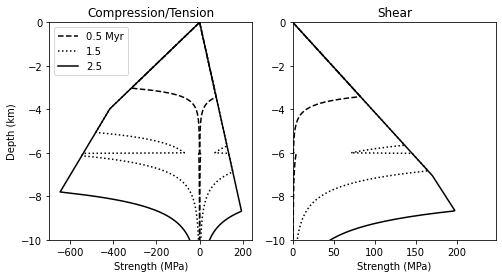

In [49]:
setattr(myLith,'crust_flow',1)
fig, axes = plt.subplots(1,2,figsize=(8.0, 4.0))
yseC, yseT, yseS = myLith.get_yse(age=ages[0])
plot_YSE(axes[0],yseC,yseT,myLith.z,color='black',linestyle='dashed')
axes[1].plot(1e-6*yseS,-1e-3*myLith.z,color='black',linestyle='dashed')
yseC, yseT, yseS = myLith.get_yse(age=ages[2])
plot_YSE(axes[0],yseC,yseT,myLith.z,color='black',linestyle='dotted')
axes[1].plot(1e-6*yseS,-1e-3*myLith.z,color='black',linestyle='dotted')
yseC, yseT, yseS = myLith.get_yse(age=ages[4])
plot_YSE(axes[0],yseC,yseT,myLith.z,color='black')
axes[1].plot(1e-6*yseS,-1e-3*myLith.z,color='black')
legend_elements = [Line2D([0], [0], linestyle='dashed', color='black', label='{} Myr'.format(ages[0])),
                   Line2D([0], [0], linestyle='dotted',color='black', label='{}'.format(ages[2])),
                   Line2D([0], [0], color='black', label='{}'.format(ages[4]))]
axes[0].legend(handles=legend_elements)
axes[0].set_title('Compression/Tension')
axes[0].set_xlabel('Strength (MPa)')
axes[0].set_ylabel('Depth (km)')

axes[1].set_title('Shear')
axes[1].set_xlim(0,np.max(1e-6*yseS)+50)
axes[1].set_ylim(-10,0)
axes[1].set_xlabel('Strength (MPa)')

plt.show()